# Sentiment Analysis

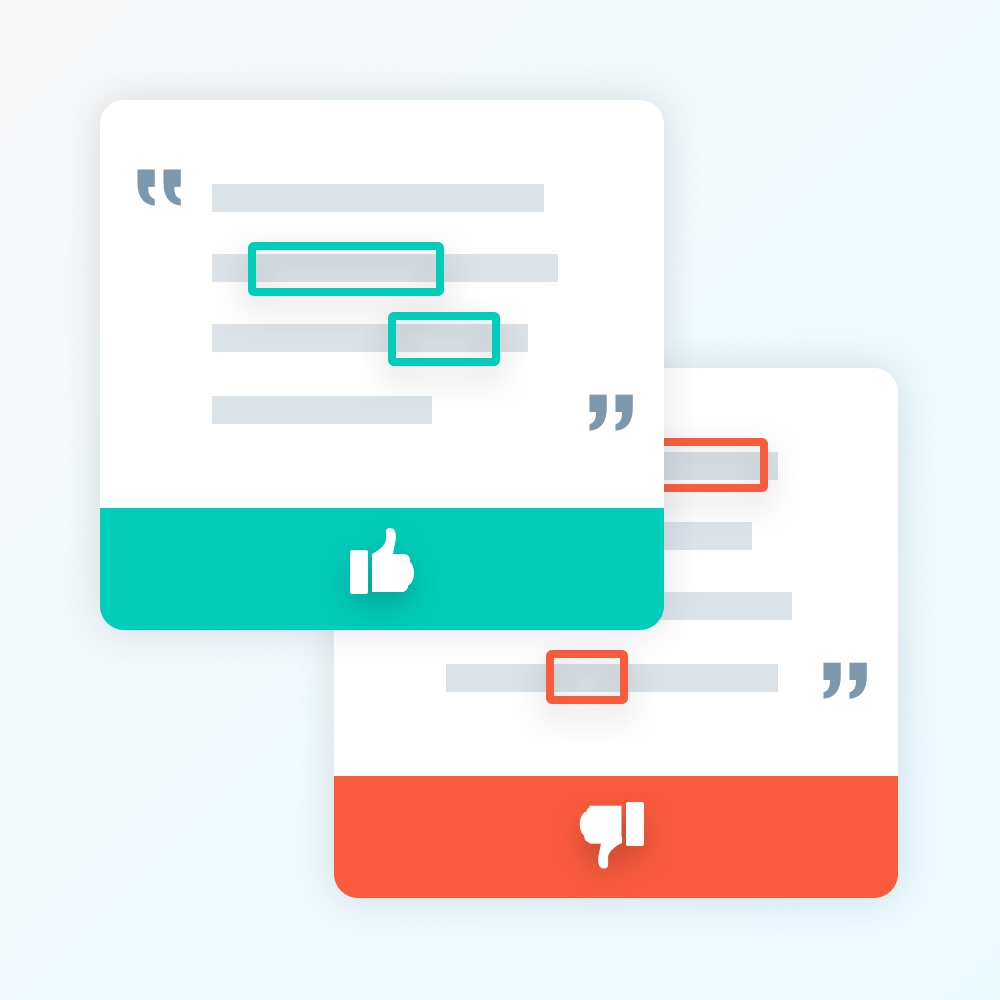

For tackling the problem of sentyment analysis we will use a simple neural net composed by Dense layers from Keras.
In order to this we should split the problem in different areas

## Import Dependencies

In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
from matplotlib import pyplot as plt
import tests as unit_test
import numpy as np
%matplotlib inline


Using TensorFlow backend.


## Load the data

We set a max of words that we want to use from this data set.

In [ ]:
max_words = 10000

We will load the dataset from imdb which contains a bunch of reviews from films.

In [ ]:
def loadData():
    return imdb.load_data(num_words=max_words)

Now we will just execute the function above to get the training data and test data

In [ ]:
(x_train,y_train),(x_test,y_test) = loadData()

## Understaing the data

Now let's try to understand the format of the data, for that the best is check the dimension of the array

In [ ]:
x_train.shape

Now we will see the content of the first row

In [ ]:
x_train[0]

As we can see the contet is a bunch of numbers, this numbers represent the index of the words (rebember word2index)
so let's try to see a complete review.
For that we will use the  word index already create from the dataset.
Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [ ]:
# TODO IMPLEMENT A FUNCTION TO REVERSE THE WORD2INX TRASNFORMATION
def reverseWords(word2vecList):
    word2vecIndx = imdb.get_word_index()
    raise NotImplementedError
    return None

#DO NOT CHANGE ANYTHING BELOW
unit_test.testReverseWords(reverseWords)

In [ ]:
reverseWords(x_train[0])

## Data transformation

Now we need to transform the data into a ndarray in order to feed the neural net. So the aim of this cells below is feed the neural net with matrices for that we need to do one-hot-encoding

Now we should code the funcion which giving a list of words is able to do a one hot encoding.

In [ ]:
def oneHotEncoding(listToEncode,dimension=max_words):
    raise NotImplementedError
    return None

#DO NOT CHANGE ANYTHING BELOW
unit_test.testOneHot(oneHotEncoding,max_words)

Now we just one hot encode the the training set and test set and the data should be ready to be used!

In [ ]:
def prepareTraningData(x_train_set,x_test_set):
    raise NotImplementedError
    return None

#DO NOT CHANGE ANYTHING BELOW
unit_test.testPreparedData(prepareTraningData,max_words)

Also we need to transform into a matrix the results, this should be so straightforward just we need to convert the inputs into a ndarray with the type 'float32'

In [ ]:
def prepareTargetData(y_train_set,y_test_set):
    raise NotImplementedError
    return None

#DO NOT CHANGE ANYTHING BELOW
unit_test.testPrepareTargetData(prepareTargetData)

## Model Creation

Here we will create our model specifying the number of hidden units and the number of layers.

Now we should create a Sequential model with 2 hidden layers and 1 output layer. 
* The first layer should have the input shape of the neural network and the activation function should be a relu.
* The second layer should have the relu as activation function as well.
* The output layer needs to have the sigmoid function as activation function.
* The number of hidden units from first and second layers should be a multiple of 2,so you can play in order to get the best results I would recomend start with 16,32,64.
Finally we should return the model

In [2]:
def createModel():
    model = models.Sequential()
    model.add(layers.Dense(12,activation="sigmoid",input_shape=(12,)))
    return model

unit_test.testModelStructure(createModel)

Expected value 'Expected 3 layers' got '1' 


AssertionError: 

## Splitting the training set into the validation set

We should split the training set into 2 pieces the paritial training set and the validation training set which will give us a hint how is going the training.

In [ ]:
x_train,x_test = prepareTraningData(x_train,x_test)
y_train,y_test = prepareTargetData(y_train,y_test)

# Split into validation set
x_val = None
partial_x_train = None
y_val = None
partial_y_train = None

## Training the Model

Now we should just indicate the number of epochs we can set to 20.And we should replace the None values with the partial training set and the validation set.
Once we replace the needed values we will start the traning.

In [ ]:
model = createModel()
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(None,None,epochs=None,batch_size=512,validation_data=None)
acc = model.evaluate(x_test,y_test)
print(acc)
model.save('./model.d5')

In [ ]:
# Only execute this cell if you want to start again the notebook and you did the previous steps
model = models.load_model('./model.d5')

## Feeding our custom input to the neural net

In [ ]:
def predictionFormat(text):
    w2i = imdb.get_word_index()
    raise NotImplementedError
    return None

#DO NOT CHANGE ANYTHING BELOW 
unit_test.testPredictionFormat(predictionFormat,max_words)

Now we will get a prediction with our custom input text.

In [ ]:
inputText = predictionFormat("This shoe is horrible and awful")
prediction = model.predict(inputText)
print(prediction)

## Understaing the training

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')      
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()